<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/%ED%94%8C%EC%A0%9D3_%EC%A0%84%EC%B2%98%EB%A6%AC%EC%B7%A8%ED%95%A9%EC%A4%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**미니 프로젝트 : 영화 관객수 예측 경진대회**
- 관련사이트 : https://dacon.io/competitions/open/235536/overview/description
- 과제 : 회귀 모델들 중 하나 이상을 해당 데이터에 적합.
- 조건 : 하이퍼 파라미터 튜닝 포함


In [1]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (13.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

# 01 데이터 불러오기

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [12]:
train=pd.read_csv("/content/drive/MyDrive/ESAA/데이터셋/movies_train.csv")
test=pd.read_csv("/content/drive/MyDrive/ESAA/데이터셋/movies_test.csv")
submission=pd.read_csv("/content/drive/MyDrive/ESAA/데이터셋/movies_submission.csv")

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


# 02 EDA 및 전처리

In [7]:
test.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [8]:
train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

## 1. 영화제목 (title)

## 2. 배급사 (distributor)


## 3. 장르 (genre)

## 4. 개봉일 (release_time)

### * 데이트타임 형식으로 바꾸고 연,월,일 나누기

In [13]:
train['release_time'] = train.release_time.apply(pd.to_datetime)
train['release_year'] = train.release_time.dt.year
train['release_quarter'] = train.release_time.dt.quarter
train['release_month'] = train.release_time.dt.month
train['release_day'] = train.release_time.dt.day
train.drop(['release_time'], axis=1, inplace=True) # 기존 개봉일 변수는 지운다.
train.head()

test['release_time'] = test.release_time.apply(pd.to_datetime)
test['release_year'] = test.release_time.dt.year
test['release_quarter'] = test.release_time.dt.quarter
test['release_month'] = test.release_time.dt.month
test['release_day'] = test.release_time.dt.day
test.drop(['release_time'], axis=1, inplace=True) # 기존 개봉일 변수는 지운다.

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            600 non-null    object 
 1   distributor      600 non-null    object 
 2   genre            600 non-null    object 
 3   time             600 non-null    int64  
 4   screening_rat    600 non-null    object 
 5   director         600 non-null    object 
 6   dir_prev_bfnum   270 non-null    float64
 7   dir_prev_num     600 non-null    int64  
 8   num_staff        600 non-null    int64  
 9   num_actor        600 non-null    int64  
 10  box_off_num      600 non-null    int64  
 11  release_year     600 non-null    int64  
 12  release_quarter  600 non-null    int64  
 13  release_month    600 non-null    int64  
 14  release_day      600 non-null    int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 70.4+ KB


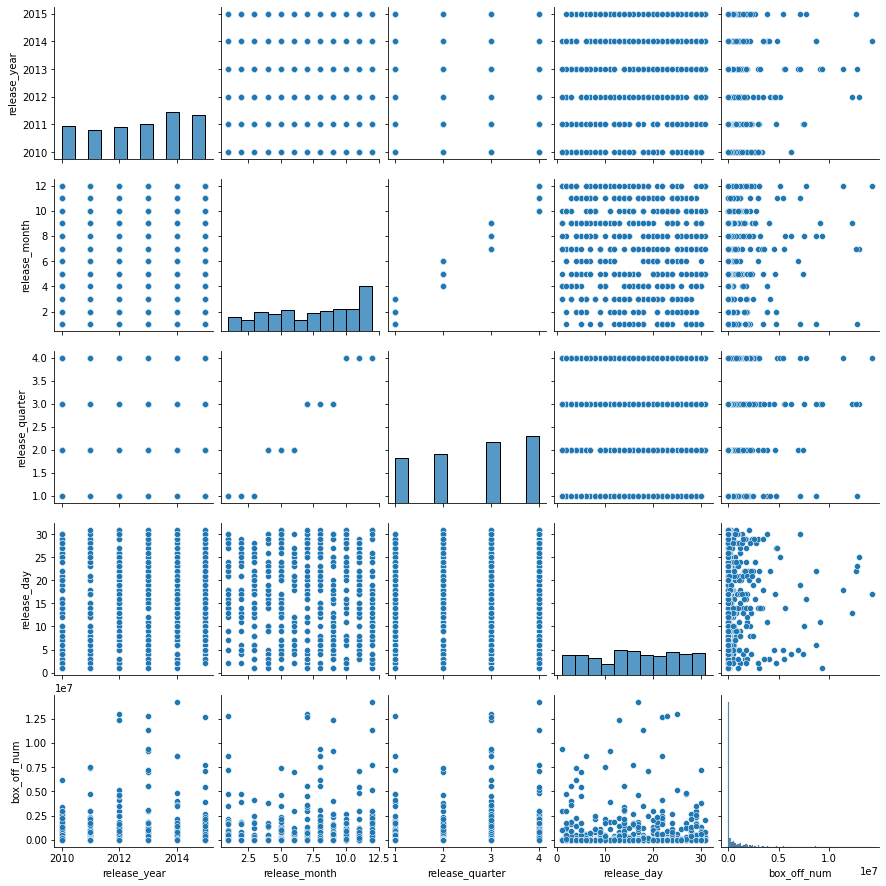

In [ ]:
sns.pairplot(train[['release_year', 'release_month', 'release_quarter', 'release_day', 'box_off_num']])
plt.show()

### * 인코딩 및 로그변환
* 카테고리형변수이므로 인코딩
* Label encoding은 가중치 부여, One-Hot encoding은 너무 많은 변수가 만들어진다는 단점이 있다.
* Binary encoding은 이진법 분류 기법으로, 가중치 부여하지 않고 적은 양의 변수만 만들어지는 장점이 있어, 이 기법을 적용한다.

In [15]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 677 kB/s 


In [16]:
import category_encoders as ce

ec_y = ce.BinaryEncoder(cols=['release_year'])
df_y = ec_y.fit_transform(train['release_year'])
df_y_te = ec_y.fit_transform(test['release_year'])

ec_m = ce.BinaryEncoder(cols=['release_month'])
df_m = ec_m.fit_transform(train['release_month'])
df_m_te = ec_m.fit_transform(test['release_month'])

ec_q = ce.BinaryEncoder(cols=['release_quarter'])
df_q = ec_q.fit_transform(train['release_quarter'])
df_q_te = ec_q.fit_transform(test['release_quarter'])

ec_d = ce.BinaryEncoder(cols=['release_day'])
df_d = ec_d.fit_transform(train['release_day'])
df_d_te = ec_d.fit_transform(test['release_day'])

train = pd.concat([train, df_y, df_m, df_q, df_d], axis=1)
train.drop(['release_year', 'release_month', 'release_quarter', 'release_day'], axis=1, inplace=True)
train.head()

test = pd.concat([test, df_y_te, df_m_te, df_q_te, df_d_te], axis=1)
test.drop(['release_year', 'release_month', 'release_quarter', 'release_day'], axis=1, inplace=True)

## 5. 상영시간 (time)

### * 데이트타임 형식으로 바꾸면 연속형변수로 활용할 수 없으므로 안한다.

In [ ]:
#train['time'] = train.time.apply(pd.to_datetime)

### * 로그변환
* time은 연속형 변수이고 불균형한 분포이므로, 로그변환하기

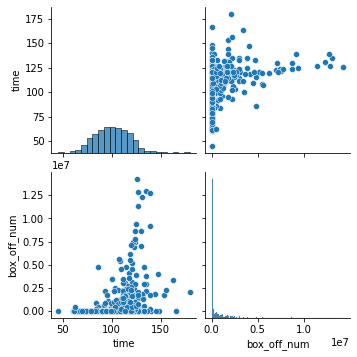

In [ ]:
sns.pairplot(train[['time', 'box_off_num']])
plt.show()

In [18]:
train['time_log'] = np.log1p(train.time)
test['time_log'] = np.log1p(test.time)
train['box_off_num_log'] = np.log1p(train.box_off_num)
#test['box_off_num_log'] = np.log1p(test.box_off_num)

### * 로그변환 후 관계 보기
* 상관관계가 명확히 드러난다.

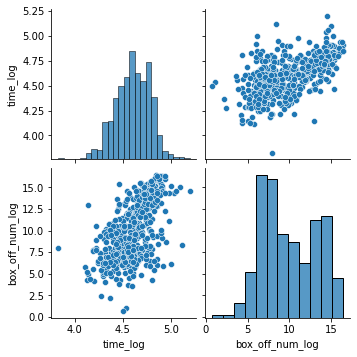

In [ ]:
sns.pairplot(train[['time_log', 'box_off_num_log']])
plt.show()

## 6. 감독이름 (director)

### * 랭크 인코딩
*   감독별 관객 수 분포 조사 -> 왜곡 정도 완화 -> 중앙값으로 rank 매기기
*   감독이 낸 영화 수를 고려하여 감독별 관객 수 평균을 이용함

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50980 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54984 missing from current font.
  font.set_

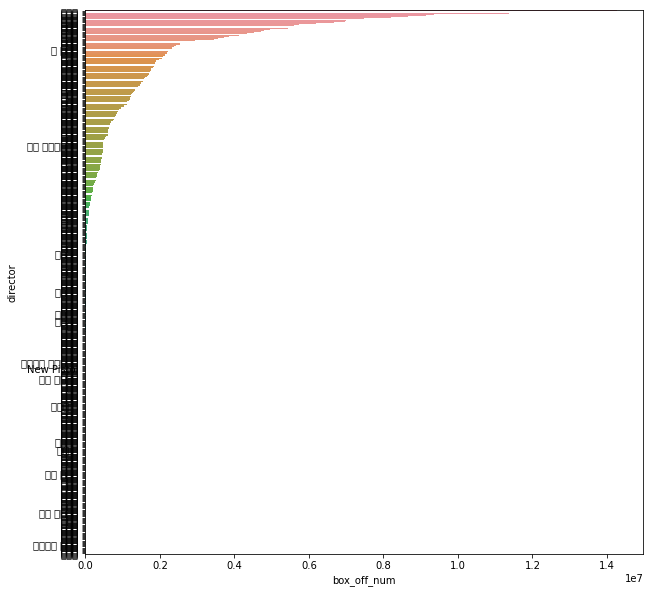

In [ ]:
director_num = train.groupby('director')['box_off_num'].mean().sort_values(ascending=False) #원래 sum이었는데 감독별 영화 수 고려하여 mean으로 수정
df6 = pd.DataFrame(director_num)
df6["director"]= df6.index #director 열 생성
plt.rcParams['figure.figsize'] = [10,10] 
ax = plt.subplots()
ax = sns.barplot(x='box_off_num', y='director',data = df6)

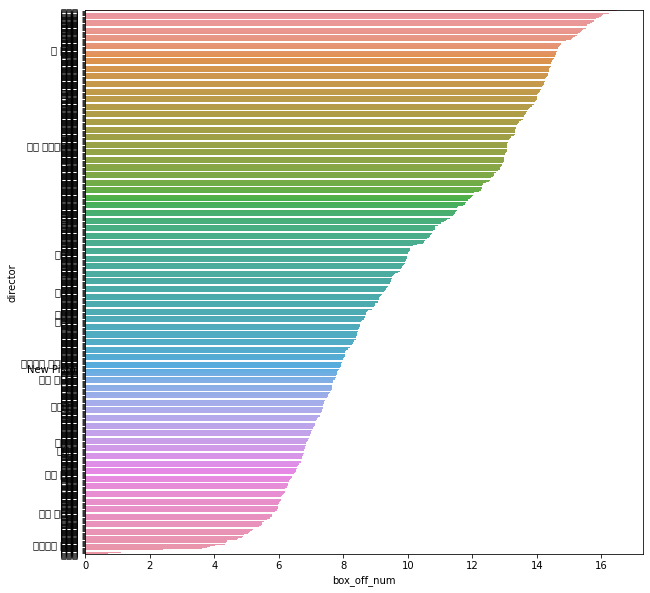

In [ ]:
#위의 그래프가 왜곡되어있으므로 log1p 변환을 통해 왜곡 정도 향상
director_num = train.groupby('director')['box_off_num'].mean().sort_values(ascending=False)
df6 = pd.DataFrame(director_num)
df6["director"]= df6.index #director 열 생성
plt.rcParams['figure.figsize'] = [10,10] 
df6["box_off_num"]=np.log1p(df6["box_off_num"])
ax = plt.subplots()
ax = sns.barplot(x='box_off_num', y='director',data = df6)

In [ ]:
df6.drop(['director'], axis=1, inplace=True)
tr_dr_rank = df6.groupby('director').box_off_num.median().reset_index(name = 'dr_rank').sort_values(by = 'dr_rank')
tr_dr_rank

,director,dr_rank
125,노성수,0.693147
85,김정호,1.098612
10,고구마,2.197225
289,이세일,2.397895
411,진광교,3.610918
...,...,...
448,한재림,16.027712
201,봉준호,16.050925
241,양우석,16.246918
416,최동훈,16.368485


In [ ]:
tr_dr_rank['dr_rank2'] = tr_dr_rank['dr_rank'].rank(method='dense', ascending=True)
#tr_dr_rank['dr_rank2'] = [i/5 + 1 for i in range(tr_dr_rank.shape[0])] #i+1로 하면 1~472로 너무 커지는 것 같아서 수정했는데, 다른 스케일링 이용할지?
#로그 스케일링 한 거니까 랭크 매기기 전 값으로 진행하면..? 일단 매기기 전 값이 dr_rank, 랭크가 dr_rank2

In [ ]:
tr_dr_rank

,director,dr_rank,dr_rank2
125,노성수,0.693147,1.0
85,김정호,1.098612,2.0
10,고구마,2.197225,3.0
289,이세일,2.397895,4.0
411,진광교,3.610918,5.0
...,...,...,...
448,한재림,16.027712,464.0
201,봉준호,16.050925,465.0
241,양우석,16.246918,466.0
416,최동훈,16.368485,467.0


In [ ]:
#dr_rank, dr_rank2 원래 데이터에 추가
train = pd.merge(train, tr_dr_rank, how = 'left')
test = pd.merge(train, tr_dr_rank, how = 'left')

In [ ]:
train.head()

## 7. 감독의 전작영화 평균 관객 수 (dir_prev_bfnum)

### * 결측치 처리

In [ ]:
train['dir_prev_bfnum'].isnull().sum()

330

In [ ]:
train.fillna(0, inplace = True)
test.fillna(0, inplace = True)
train['dir_prev_bfnum'].isnull().sum()

0

### * 랭크 인코딩
* 위와 같은 방법

director_num = train.groupby('director')['dir_prev_bfnum'].sum().sort_values(ascending=False)
df7 = pd.DataFrame(director_num)
df7["director"]= df7.index #director 열 생성
plt.rcParams['figure.figsize'] = [10,10] 
ax = plt.subplots()
ax = sns.barplot(x='dir_prev_bfnum', y='director',data = df7)

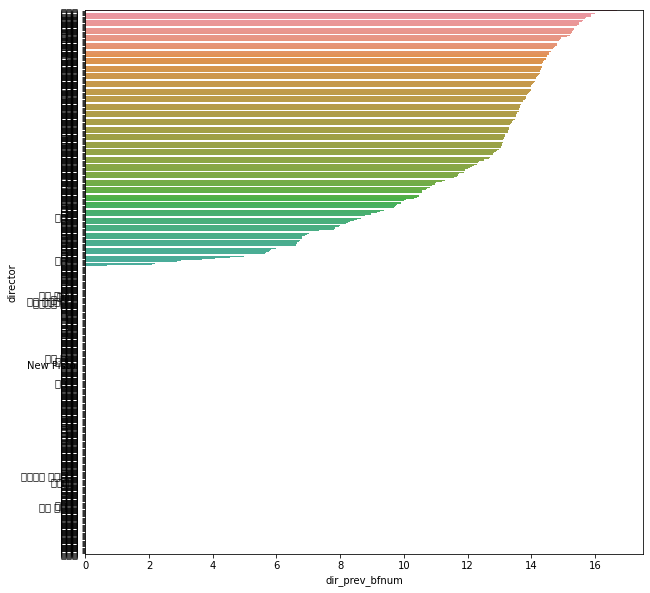

In [ ]:
#위의 그래프가 왜곡되어있으므로 log1p 변환을 통해 왜곡 정도 향상
director_num = train.groupby('director')['dir_prev_bfnum'].sum().sort_values(ascending=False)
df7 = pd.DataFrame(director_num)
df7["director"]= df7.index #director 열 생성
plt.rcParams['figure.figsize'] = [10,10] 
df7['dir_prev_bfnum']=np.log1p(df7['dir_prev_bfnum']) 
ax = plt.subplots()
ax = sns.barplot(x='dir_prev_bfnum', y='director',data = df7)

In [ ]:
df7.drop(['director'], axis=1, inplace=True)
tr_drbf_rank = df7.groupby('director').dir_prev_bfnum.median().reset_index(name = 'drbf_rank').sort_values(by = 'drbf_rank')
tr_drbf_rank

,director,drbf_rank
0,New Pistol,0.000000
277,이대희,0.000000
275,이길보라,0.000000
273,이규만,0.000000
272,이광호,0.000000
...,...,...
62,김상진,15.871628
232,심형래,15.876721
53,김민석,15.990449
5,강형철,16.591959


In [ ]:
tr_drbf_rank['drbf_rank2'] = tr_drbf_rank['drbf_rank'].rank(method='dense', ascending=True)
tr_drbf_rank

,director,drbf_rank,drbf_rank2
0,New Pistol,0.000000,1.0
277,이대희,0.000000,1.0
275,이길보라,0.000000,1.0
273,이규만,0.000000,1.0
272,이광호,0.000000,1.0
...,...,...,...
62,김상진,15.871628,213.0
232,심형래,15.876721,214.0
53,김민석,15.990449,215.0
5,강형철,16.591959,216.0


In [ ]:
#drbf_rank, drbf_rank2 원래 데이터에 추가
train = pd.merge(train, tr_drbf_rank, how = 'left')
test = pd.merge(train, tr_drbf_rank, how = 'left')

In [ ]:
train.head()

## 8. 감독의 전작영화 수 (dir_prev_num)

In [ ]:
train['dir_prev_num'].isnull().sum()

0

### * 랭크 인코딩
* 위와 같은 방법

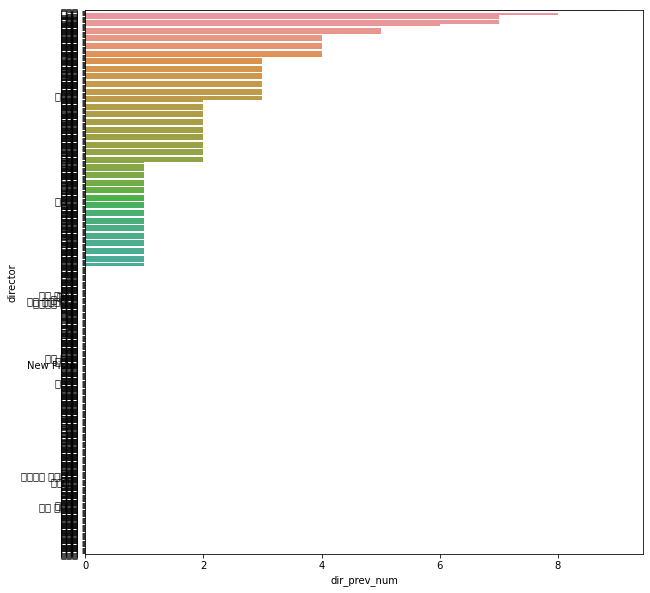

In [ ]:
director_num = train.groupby('director')['dir_prev_num'].sum().sort_values(ascending=False)
df8 = pd.DataFrame(director_num)
df8["director"]= df8.index #director 열 생성
plt.rcParams['figure.figsize'] = [10,10] 
ax = plt.subplots()
ax = sns.barplot(x='dir_prev_num', y='director',data = df8)

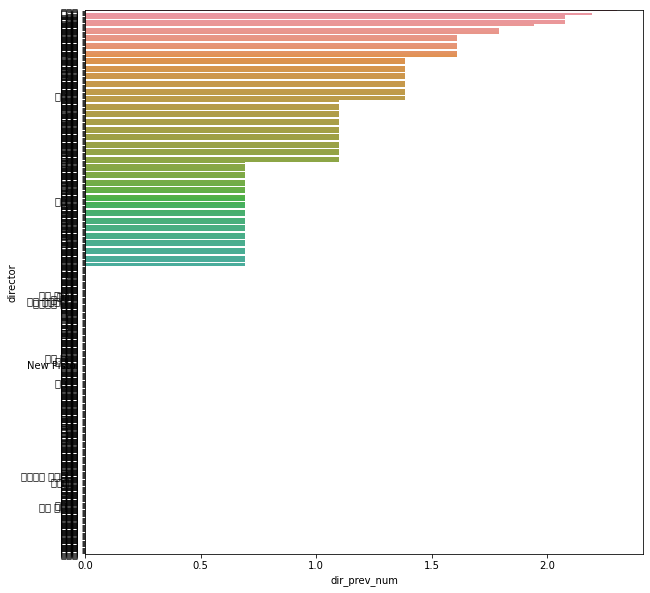

In [ ]:
#위의 그래프가 왜곡되어있으므로 log1p 변환을 통해 왜곡 정도 향상
director_num = train.groupby('director')['dir_prev_num'].sum().sort_values(ascending=False)
df8 = pd.DataFrame(director_num)
df8["director"]= df8.index #director 열 생성
plt.rcParams['figure.figsize'] = [10,10] 
df8['dir_prev_num']=np.log1p(df8['dir_prev_num']) 
ax = plt.subplots()
ax = sns.barplot(x='dir_prev_num', y='director',data = df8)

In [ ]:
df8.drop(['director'], axis=1, inplace=True)
tr_drp_rank = df8.groupby('director').dir_prev_num.median().reset_index(name = 'drp_rank').sort_values(by = 'drp_rank')
tr_drp_rank

,director,drp_rank
0,New Pistol,0.000000
277,이대희,0.000000
275,이길보라,0.000000
273,이규만,0.000000
272,이광호,0.000000
...,...,...
258,유하,2.079442
324,이해영,2.197225
118,김휘,2.197225
62,김상진,2.197225


In [ ]:
tr_drp_rank['drp_rank2'] = tr_drp_rank['drp_rank'].rank(method='dense', ascending=True)
tr_drp_rank

,director,drp_rank,drp_rank2
0,New Pistol,0.000000,1.0
277,이대희,0.000000,1.0
275,이길보라,0.000000,1.0
273,이규만,0.000000,1.0
272,이광호,0.000000,1.0
...,...,...,...
258,유하,2.079442,8.0
324,이해영,2.197225,9.0
118,김휘,2.197225,9.0
62,김상진,2.197225,9.0


In [ ]:
#drp_rank, drp_rank2 원래 데이터에 추가
train = pd.merge(train, tr_drp_rank, how = 'left')
test = pd.merge(train, tr_drp_rank, how = 'left')

In [ ]:
train.head()

### * 감독 관련 변수(6,7,8번)를 결합한 전처리

In [ ]:
train['dr_mean'] = (train['dr_rank']+train['drbf_rank'])/2  #6,7번 평균낸 변수 추가
test['dr_mean'] = (test['dr_rank']+test['drbf_rank'])/2
train.head()

In [ ]:
train['dr_mean2'] = train['dr_mean'].rank(method='dense', ascending=True) #평균값 rank 변수 추가
test['dr_mean2'] = test['dr_mean'].rank(method='dense', ascending=True)
train.head()

In [ ]:
train.drop(['director','dir_prev_bfnum','dir_prev_num'], axis=1, inplace=True) #새 변수 만드는데 사용한 변수 모두 삭제. box_off_num은 전이나 후에 타겟 처리
test.drop(['director','dir_prev_bfnum','dir_prev_num'], axis=1, inplace=True)
train.head()

,title,distributor,genre,release_time,time,screening_rat,num_staff,num_actor,box_off_num,dr_rank,dr_rank2,drbf_rank,drbf_rank2,drp_rank,drp_rank2,dr_mean,dr_mean2
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,91,2,23398,10.060449,261.0,0.000000,1.0,0.000000,1.0,5.030224,180.0
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,387,3,7072501,14.869871,441.0,15.484314,205.0,1.945910,7.0,15.177092,461.0
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,343,4,6959083,15.755558,459.0,12.304905,86.0,1.609438,5.0,14.030232,420.0
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,20,6,217866,12.291640,315.0,10.081425,56.0,1.098612,3.0,11.186532,345.0
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,251,2,483387,13.088575,354.0,0.693147,2.0,0.693147,2.0,6.890861,245.0


6,7,8. director와 box_off_num, dir_prev_bfnum, dir_prev_num을 이용해 director의 rank 생성

*   1) 6,7번 평균값 사용안할거면 dr_rank,2, drbf_rank,2 중 사용-dr_mean,2 삭제
*   2) 평균값 사용할거면 dr_rank,2, drbf_rank,2 삭제-dr_mean,2 중 사용
*   3) 8번은 drp_rank,2 중 하나만 골라 쓰면 됨
*   (주의) log1p 변환하고 나면 이전으로 돌아가는 과정 필요하니 그래프 두 개씩 그릴때 순서대로 그리기. 아니면 두 개 한번에 그리거나

=> 일단 dr_mean, drp_rank2만 남겨놓음

In [ ]:
train.drop(['dr_rank','dr_rank2','drbf_rank','drbf_rank2','drp_rank','dr_mean2'], axis=1, inplace=True) #위에 필기 반영
test.drop(['dr_rank','dr_rank2','drbf_rank','drbf_rank2','drp_rank','dr_mean2'], axis=1, inplace=True)
train.head()

,title,distributor,genre,release_time,time,screening_rat,num_staff,num_actor,box_off_num,drp_rank2,dr_mean
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,91,2,23398,1.0,5.030224
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,387,3,7072501,7.0,15.177092
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,343,4,6959083,5.0,14.030232
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,20,6,217866,3.0,11.186532
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,251,2,483387,2.0,6.890861


## 9. 스텝 수 (num_staff)

## 10. 주연배우 수 (num_actor)

## 11. 상영등급 (screening_rat)

## 12. 관객 수 (box_off_num)